In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision.datasets import MNIST
from torchvision import transforms
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable

from trainer_test import fit
import numpy as np
cuda = torch.cuda.is_available()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
mean, std = 0.1307, 0.3081
batch_size = 256

train_dataset = MNIST('../data/MNIST', 'train', download=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
test_dataset = MNIST('../data/MNIST', 'test', download=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((mean,), (std,))
                            ]))


mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(mnist_classes)

def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 2))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels


Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/SVHN\MNIST\raw\train-images-idx3-ubyte.gz to ../data/SVHN\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/SVHN\MNIST\raw\train-labels-idx1-ubyte.gz to ../data/SVHN\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/SVHN\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data/SVHN\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/SVHN\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/SVHN\MNIST\raw



c:\users\az connects\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [4]:
from datasets import BalancedBatchSampler

# We'll create mini batches by sampling labels that will be present in the mini batch and number of examples from each class
train_batch_sampler = BalancedBatchSampler(train_dataset.train_labels, n_classes=10, n_samples=25)
test_batch_sampler = BalancedBatchSampler(test_dataset.test_labels, n_classes=10, n_samples=25)

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
online_train_loader = torch.utils.data.DataLoader(train_dataset, batch_sampler=train_batch_sampler, **kwargs)
online_test_loader = torch.utils.data.DataLoader(test_dataset, batch_sampler=test_batch_sampler, **kwargs)

# Set up the network and training parameters
from networks import EmbeddingNet
from losses import OnlineTripletLoss
from utils import AllTripletSelector,HardestNegativeTripletSelector, RandomNegativeTripletSelector, SemihardNegativeTripletSelector # Strategies for selecting triplets within a minibatch
from metrics import AverageNonzeroTripletsMetric

margin = 1.
embedding_net = EmbeddingNet()
model = embedding_net
if cuda:
    model.cuda()
loss_fn = OnlineTripletLoss(margin, RandomNegativeTripletSelector(margin))
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 1
log_interval = 50

c:\users\az connects\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\users\az connects\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [35]:
# batch_images1 = []
# batch_images2 = []
# batch_images3 = []

# for batch_idx, (data, target) in enumerate(online_train_loader):
#    # print(len(data))
#    # print(type(data))
#     if not type(data) in (tuple, list,):
#         data = (data,)
#     #print(data,target)
#         #print(type(data))
#         #print(type(target))
#         #print(len(data[0]))
#     batch_images1 = data
#     #batch_images2 = target
       
    
        
#     #print(data)
#     #print(len(data))
    



#     break


In [36]:
print(len(data))

1


In [5]:
# ind = 0
# for i in range(len(batch_images1)):
#     print(i)
#     plt.subplot(131)
#     plt.title("anchor image")
#     plt.imshow(batch_images1[i].reshape(28,28),cmap="gray")
# #     plt.subplot(132)
# #     plt.title("positive image")
# #     plt.imshow(batch_images2[i].reshape(28,28),cmap="gray")
# #     plt.subplot(133)
# #     plt.title("negative image")
# #     plt.imshow(batch_images3[i].reshape(28,28),cmap="gray")
#     plt.show()

NameError: name 'batch_images1' is not defined

In [38]:
# ind = 0
# for i in range(len(batch_images1)):
#     plt.subplot(131)
#     plt.title("anchor image")
#     plt.imshow(batch_images1[i].reshape(28,28),cmap="gray")
#     plt.subplot(132)
#     plt.title("positive image")
#     plt.imshow(batch_images2[i].reshape(28,28),cmap="gray")
#     plt.subplot(133)
#     plt.title("negative image")
#     plt.imshow(batch_images3[i].reshape(28,28),cmap="gray")
#     plt.show()


In [6]:
epochlosses = fit(online_train_loader, online_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

c:\users\az connects\appdata\local\programs\python\python37\lib\site-packages\torch\optim\lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
c:\users\az connects\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, pad

Train: [0/60000 (0%)]	Loss: 0.999579
Train: [12500/60000 (21%)]	Loss: 0.974024
Train: [25000/60000 (42%)]	Loss: 0.974108
Train: [37500/60000 (62%)]	Loss: 0.975874
Train: [50000/60000 (83%)]	Loss: 0.978034
Epoch: 1/1. Train set: Average loss: 0.9780
Epoch: 1/1. Validation set: Average loss: 0.8794


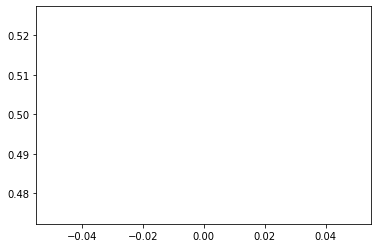

In [7]:
import matplotlib.pyplot as plt 
epochs = []
losses = []
for epoch,loss in epochlosses:
    epochs.append(epoch)
    losses.append(loss[-1])
plt.plot(epochs,losses)
plt.show()

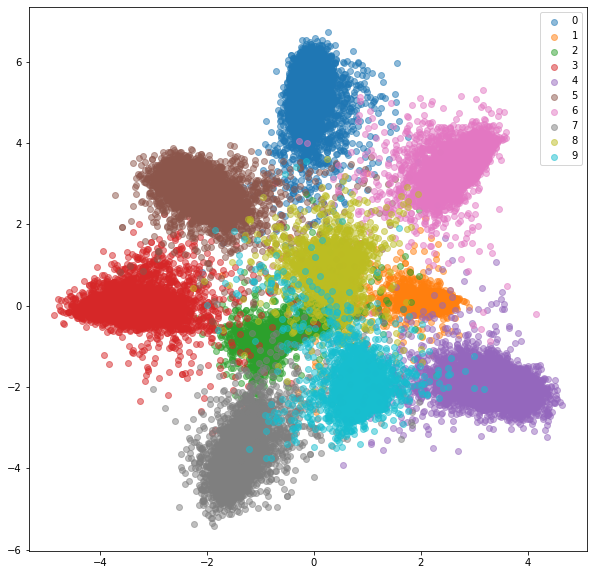

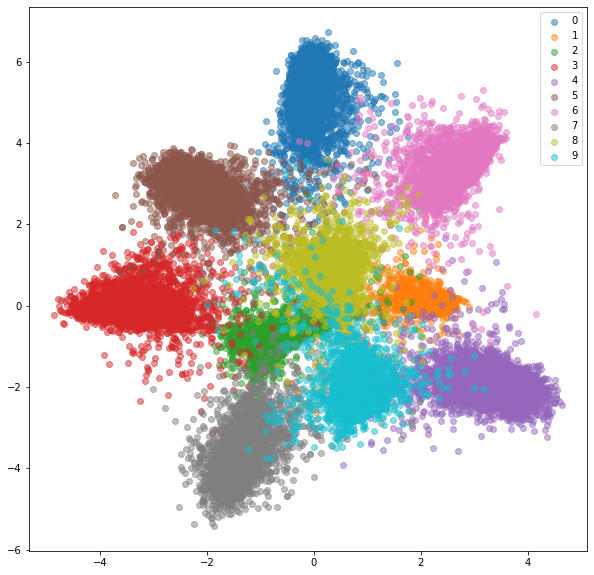

In [8]:
train_embeddings_ocl, train_labels_ocl = extract_embeddings(train_loader, model)
plot_embeddings(train_embeddings_ocl, train_labels_ocl)
val_embeddings_ocl, val_labels_ocl = extract_embeddings(test_loader, model)
plot_embeddings(val_embeddings_ocl, val_labels_ocl)

In [42]:
# with torch.no_grad():
#         model.eval()
#         difference_coeffs = np.zeros((len(online_test_loader.dataset), 2, 2))
#         k=0
#         for batch_idx, (data,target) in enumerate(online_test_loader):
#             target = target if len(target) > 0 else None
#             if not type(data) in (tuple, list):
#                 data = (data,)
#             images0 = data[0]
#             #images1 = data[1]
#             #images2 = data[2]
#             img0embeddings = model.get_embedding(images0).data.cpu().numpy()
#             #img1embeddings = model.get_embedding(images1).data.cpu().numpy()
#             #img2embeddings = model.get_embedding(images2).data.cpu().numpy()
            
#             diff = np.array([])
            
#             #for every image set in the batch
#             for i in range(len(img0embeddings)):
#                 distance_positive = np.square(img0embeddings[i][0]-img1embeddings[i][0]) + np.square(img0embeddings[i][1]-img1embeddings[i][1])
#                 distance_negative = np.square(img0embeddings[i][0]-img2embeddings[i][0]) + np.square(img0embeddings[i][1]-img2embeddings[i][1]) 
#                 dist_tar = np.array([[distance_positive,1],[distance_negative,0]])
#                 diff = np.append(diff,dist_tar)

#             # print(diff.shape)
#             diff = np.reshape(diff, (-1, 2, 2))
#             difference_coeffs[k:k+len(images0)] = diff
#             k += len(images0)

IndexError: tuple index out of range

In [ ]:
# print(len(difference_coeffs))
# for i in range(2):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")

# for i in range(1000,1001):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(2000,2002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(3000,3002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(4000,4002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(5000,5002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(6000,6002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(7000,7002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(8000,8002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")
    
# for i in range(9000,9002):
#     sample = triplet_test_loader.dataset[i]
#     fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
#     plt.title("dp: " + str(difference_coeffs[i][0])+ " dn: " + str(difference_coeffs[i][1]))
#     ax1.imshow(sample[0][0].reshape(28,28),"gray")
#     ax2.imshow(sample[0][1].reshape(28,28),"gray")
#     ax3.imshow(sample[0][2].reshape(28,28),"gray")

In [ ]:
threshold_positive = 0.5
threshold_negative = 1

In [ ]:
# print(difference_coeffs.shape)
# predictions = np.array([])
# targets = np.array([])
# for x in difference_coeffs:
#     #positive
#     targets = np.append(targets,1)
#     if(x[0][0] <= threshold_positive ):
#         predictions = np.append(predictions,1)
#     else:
#         predictions = np.append(predictions,0)
#     #negative
#     targets = np.append(targets,0)
#     if(x[0][1] >= threshold_positive ):
#         predictions = np.append(predictions,0)
#     else:
#         predictions = np.append(predictions,1)

        
# accuracy = len(predictions[predictions == 1])/len(predictions)

In [ ]:
# from sklearn.metrics import confusion_matrix
# cf = confusion_matrix(targets, predictions)

In [ ]:
# import seaborn as sns
# sns.heatmap(cf, annot=True)